In [1]:
import spacy
import medspacy
from medspacy.visualization import visualize_ent

from IPython.display import YouTubeVideo

In [2]:
nlp = medspacy.load()

In [3]:
nlp.pipe_names

['tagger',
 'parser',
 'target_matcher',
 'sectionizer',
 'context',
 'postprocessor']

# Overview
## What if we used machine learning rather than a rules-based system?

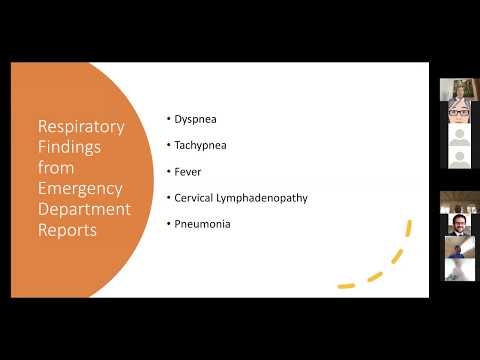

In [4]:
YouTubeVideo("UEm7H8cfz80", start=2600, end=2708, rel=0)

# V. Using a Pre-Trained Machine Learning Model
So far, we've been using **rule-based methods** to extract concepts from text. An alternative is **statistical NLP**, where you train a machine learning classifier to extract concepts based on annotated datasets.

We'll use a model trained on the i2b2 2012 shared task: [**"Evaluating temporal relations in clinical text"**](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3756273/). This model was trained on data for the first subtask in the shared task, referred to in the challenge as **"Clinically relevant events"**. For the purpose of this module, I specifically restricted it to the following labels of **clinical concepts**:
- **Problems:** Diagnoses, signs, and symptoms
- **Tests:** Lab and vital measurements
- **Treatments:** Medications, procedures, and therapies


The model has been pre-installed and is available with the name **"en_info_3700_i2b2_2012"**. To install on your own machine, run this command to download and install the model:
```pip
pip install https://github.com/abchapman93/spacy_models/raw/master/releases/en_info_3700_i2b2_2012-0.1.0/dist/en_info_3700_i2b2_2012-0.1.0.tar.gz
```

We can load this using both spacy or medSpaCy.

In [5]:
# Using spaCy
# nlp = spacy.load("en_info_3700_i2b2_2012")
# Using medSpaCy
nlp = medspacy.load("en_info_3700_i2b2_2012")

In [6]:
nlp.pipe_names

['tagger',
 'parser',
 'ner',
 'target_matcher',
 'sectionizer',
 'context',
 'postprocessor']

Let's see what labels will be predicted by the NER component:

In [7]:
ner = nlp.get_pipe("ner")
ner.labels

('PROBLEM', 'TEST', 'TREATMENT')

Now let's see what concepts are extracted by our model. Any of the target concepts in `doc.ents` will have been extracted by the statistical NER model. MedSpaCy will keep extracting the modifiers and section titles.

In [8]:
text = """Past Medical History:
1. Type II DM
2. Afib
3. CKD Stage 3

Family History:
1. Breast Cancer


Reason for this examination: Possible pneumonia.

IMPRESSION:
No evidence of pneumonia.

Assessment/Plan:
Continue metformin for type 2 dm."""
doc = nlp(text)

In [9]:
print(doc.ents)

(Type II DM, Afib, this examination, pneumonia, pneumonia, metformin)


In [10]:
visualize_ent(doc)

### Discussion
- Compared with our rule-based system, how did the clinical NER do with our text? 
- How could you improve its performance?

## Next Steps

[nlp-05-clinical-nlp-workshop.ipynb](nlp-05-clinical-nlp-workshop.ipynb)